

```
# This is formatted as code
```

#**Tugas Besar MCL Tahap 2 Classification**
Nama Anggota Kelompok:
1. **Hafidz Lazuardi** (1301184200)
2. **Dhimas Hafid Kurniawan** (1301184054)

#Import library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
import random
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

#Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving salju_train.csv to salju_train.csv


In [ ]:
datatrain = pd.read_csv("salju_train.csv")
datatrain

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,109091,31/01/2009,C38,20.1,23.7,0.0,7.2,8.9,ESE,43.0,SE,ESE,24.0,26.0,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,Tidak,Ya
109091,109092,03/11/2010,C16,15.7,25.2,0.0,NaN,NaN,SSE,37.0,SSE,E,28.0,19.0,52.0,52.0,1018.4,1016.2,NaN,NaN,23.8,24.4,Tidak,Ya
109092,109093,11/11/2010,C17,7.5,20.4,1.6,NaN,NaN,NW,33.0,N,NW,4.0,13.0,92.0,51.0,1014.5,1010.6,NaN,NaN,12.6,19.8,Ya,Tidak
109093,109094,16/04/2012,C11,10.8,29.8,0.0,7.8,11.2,E,48.0,ESE,SE,13.0,26.0,35.0,18.0,1020.0,1015.8,0.0,1.0,21.7,29.2,Tidak,Tidak


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving salju_test.csv to salju_test (1).csv


In [ ]:
datatest = pd.read_csv("salju_test.csv")
datatest

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,14/11/2012,C40,7.8,25.8,0.0,8.0,13.2,NE,31.0,ENE,NW,22.0,13.0,59.0,21.0,1017.1,1014.2,6.0,1.0,16.8,24.0,No,No
18178,24/10/2015,C40,12.4,26.6,0.0,8.0,11.6,NW,37.0,NE,WNW,17.0,20.0,59.0,25.0,1022.2,1018.7,1.0,1.0,17.1,25.7,No,No
18179,31/08/2010,C21,6.7,22.9,0.0,NaN,NaN,NaN,NaN,NaN,NW,0.0,4.0,84.0,35.0,NaN,NaN,1.0,2.0,11.8,22.0,No,No
18180,24/08/2013,C12,12.5,26.7,0.0,9.0,10.8,NE,35.0,SW,ENE,2.0,26.0,56.0,45.0,1021.9,1018.1,5.0,5.0,22.9,25.4,No,No


In [ ]:
# Mengganti nama kolom "BersaljuBesok" menjadi "Class" pada datatest
datatest.rename(columns={'BersaljuBesok':'Class'}, inplace=True)

# Mengganti nama kolom 'BersaljuBesok' menjadi 'Class' pada datatrain
datatrain.rename(columns={'BersaljuBesok':'Class'}, inplace=True)

# Data Pre Processing (Raw Data)

In [ ]:
#drop kolom yang tidak diperlukan pada datatrain
datatrain = datatrain.drop(columns=['id'])

In [ ]:
#menampilkan jumlah data pada kolom class pada datatest
datatest['Class'].value_counts()

No     13824
Yes     3939
Name: Class, dtype: int64

In [ ]:
#menampilkan jumlah data pada kolom class pada datatrain
datatrain['Class'].value_counts()

Tidak    82701
Ya       23963
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


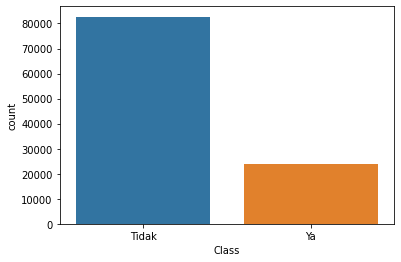

In [ ]:
# Memvisualisasi data pada kolom 'Class' pada datatrain
train_plot = sns.countplot(datatrain['Class'])
train_plot.set_xticklabels(['Tidak','Ya'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


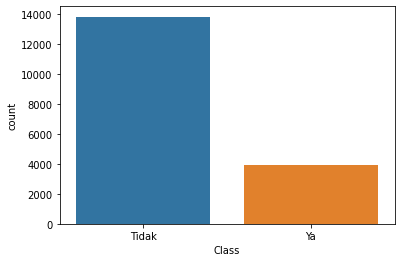

In [ ]:
# Memvisualisasi data pada kolom 'Class' pada datatest
train_plot = sns.countplot(datatest['Class'])
train_plot.set_xticklabels(['Tidak','Ya'])
plt.show()

##Data preprocessing untuk data train

In [ ]:
train_0 = datatrain[datatrain['Class'] == 'Tidak']
train_1 = datatrain[datatrain['Class'] == 'Ya']

print("Class 0 :", train_0.shape)
print("Class 1 :", train_1.shape)

Class 0 : (82701, 23)
Class 1 : (23963, 23)




> Oversampling Data



In [ ]:
train_count_0, train_count_1 = datatrain['Class'].value_counts()
train_1_over = train_1.sample(train_count_0, replace = True)

salju_train_sampling = pd.concat([train_1_over, train_0], axis=0)

print("Total Class 1 and 0 :", salju_train_sampling['Class'].value_counts())

Total Class 1 and 0 : Ya       82701
Tidak    82701
Name: Class, dtype: int64


In [ ]:
# Mengecek missing values
salju_train_sampling.isnull().sum()

Tanggal                         0
KodeLokasi                      0
SuhuMin                       786
SuhuMax                       323
Hujan                        2263
Penguapan                   71275
SinarMatahari               78527
ArahAnginTerkencang         11533
KecepatanAnginTerkencang    11434
ArahAngin9am                10945
ArahAngin3pm                 4819
KecepatanAngin9am            1642
KecepatanAngin3pm            3233
Kelembaban9am                2284
Kelembaban3pm                4486
Tekanan9am                  16322
Tekanan3pm                  16350
Awan9am                     60980
Awan3pm                     64214
Suhu9am                      1209
Suhu3pm                      3412
BersaljuHariIni              2263
Class                           0
dtype: int64

In [ ]:
# Mengatasi Missing Values
salju_train_sampling.fillna(salju_train_sampling.median(), inplace=True)  
# Nilai Numeric diisi dengan nilai median              

salju_train_sampling = salju_train_sampling.fillna(salju_train_sampling.mode().iloc[0]) 
# Nilai String diisi dengan nilai modus

In [ ]:
# Mengecek missing values
salju_train_sampling.isnull().sum()

Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
Class                       0
dtype: int64



> Menentukan Fitur Categorical



In [ ]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = salju_train_sampling.columns.values.tolist()
for col in features:
    if salju_train_sampling[col].dtype in numerics: continue
    categorical_columns.append(col)  



> Encoding Fitur Categorical



In [ ]:
for col in categorical_columns:
    if col in salju_train_sampling.columns:
        enco = LabelEncoder()
        enco.fit(list(salju_train_sampling[col].astype(str).values))
        salju_train_sampling[col] = enco.transform(list(salju_train_sampling[col].astype(str).values))

In [ ]:
salju_train_sampling.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Class
75745,419,26,3.0,17.1,0.0,4.4,6.9,6,50.0,3,14,9.0,22.0,84.0,93.0,1015.0,1012.4,6.0,6.0,12.6,14.7,0,1
108371,1849,34,6.2,15.3,4.2,1.8,6.9,5,33.0,6,6,11.0,11.0,93.0,87.0,1015.7,1014.1,8.0,8.0,12.2,14.9,1,1
79848,3314,37,6.1,12.5,3.4,1.2,5.2,8,41.0,5,3,7.0,11.0,99.0,92.0,1003.1,999.1,6.0,6.0,9.2,11.6,1,1
15317,1791,45,25.2,31.3,11.8,3.8,3.2,12,37.0,6,10,11.0,6.0,76.0,78.0,1007.9,1005.2,7.0,7.0,29.9,28.7,1,1
102437,2571,21,10.2,16.9,10.0,1.0,5.2,11,48.0,12,12,7.0,22.0,100.0,82.0,1015.2,1016.3,7.0,7.0,12.4,11.5,1,1


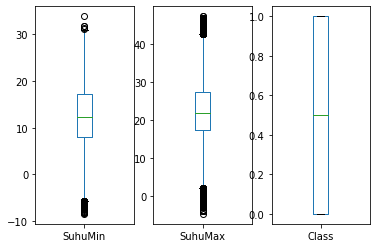

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Mengecek Outliers
f,axes = plt.subplots(1,3)
plt.figure(figsize=(20,10))
salju_train_sampling['SuhuMin'].plot(kind='box',ax=axes[0])
salju_train_sampling['SuhuMax'].plot(kind='box',ax=axes[1])
salju_train_sampling['Class'].plot(kind='box',ax=axes[2])

In [ ]:
#Metode IQR untuk SuhuMin
Q1=salju_train_sampling['SuhuMin'].quantile(0.25)
Q3=salju_train_sampling['SuhuMin'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

8.0
17.2
9.2
-5.799999999999999 31.0


In [ ]:
salju_train_sampling = salju_train_sampling[salju_train_sampling['SuhuMin']< Upper_Whisker]
salju_train_sampling = salju_train_sampling[salju_train_sampling['SuhuMin']> Lower_Whisker]

In [ ]:
#Metode IQR untuk SuhuMax
Q1=salju_train_sampling['SuhuMax'].quantile(0.25)
Q3=salju_train_sampling['SuhuMax'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

17.2
27.4
10.2
1.9000000000000004 42.699999999999996


In [ ]:
salju_train_sampling = salju_train_sampling[salju_train_sampling['SuhuMax']< Upper_Whisker]
salju_train_sampling = salju_train_sampling[salju_train_sampling['SuhuMax']> Lower_Whisker]

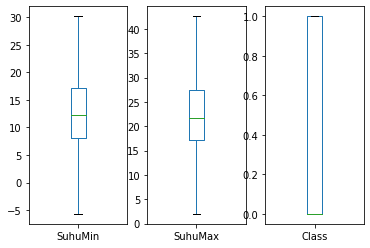

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Mengecek Outliers setelah menggunakan metode IQR
f,axes = plt.subplots(1,3)
plt.figure(figsize=(20,10))
salju_train_sampling['SuhuMin'].plot(kind='box',ax=axes[0])
salju_train_sampling['SuhuMax'].plot(kind='box',ax=axes[1])
salju_train_sampling['Class'].plot(kind='box',ax=axes[2])

plt.show()

In [ ]:
# Mengecek Data Unique
def check(data):
  for col in data.columns:
    print(col, data[col].unique())

check(salju_train_sampling)

Tanggal [ 419 1849 3314 ... 3010 1002 3153]
KodeLokasi [26 34 37 45 21 30 18  4  1 12  5 22 32 13 14 33 27 19  9  3 46 23 11 20
  0 41 39 35 36 17 15  2 38 31 28  7  8  6 48 42 10 24 47 25 44 16 40 29
 43]
SuhuMin [ 3.   6.2  6.1 25.2 10.2 21.4 18.5 14.6 11.1 -0.5  7.  22.  15.4 19.
 13.3 11.3 21.3 11.8  7.2 18.1 11.4  9.2 19.8 12.  18.6 23.7 18.9  1.9
  6.8 20.6  6.3  1.3 23.5 11.   7.9  9.  13.6  7.5 17.8  5.2  9.5 24.5
  1.7 11.2  9.4 11.6  0.9 21.6  4.3  5.6 17.7 14.7 17.4  9.7 28.1 12.6
 13.  18.2 19.3 20.4  2.1 10.5  8.7  9.1 14.3 19.2  9.3  3.4  3.5 24.1
 23.8  3.7 14.1 16.5 17.1  8.2 23.4 20.1 17.6 24.7 12.2 19.7 19.1 14.8
 16.1 12.1 13.7 19.6  8.3 22.4 15.9 24.3 11.7 13.9  9.8 14.5 11.9 18.4
  3.1  4.9  8.9 12.4  5.9  1.5  7.1 24.2  8.8  7.3 13.2 13.4 10.7  2.9
 13.8 15.7 11.5 16.2 15.8  2.6 21.9 23.9 10.4  6.4 17.   7.4 21.8  7.7
  6.6 15.  20.8 14.  27.9 15.1 12.7  8.4 10.3 13.5 10.8 15.2 20.7  5.4
 14.2  4.   5.5 16.  17.5  9.6 26.6 16.8  5.  -0.7  6.5 18.3  6.7  3.6
  8.  

In [ ]:
# Mengecek type atribut
print(salju_train_sampling.dtypes)

Tanggal                       int64
KodeLokasi                    int64
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang           int64
KecepatanAnginTerkencang    float64
ArahAngin9am                  int64
ArahAngin3pm                  int64
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni               int64
Class                         int64
dtype: object


##Data preprocessing untuk data test

In [ ]:
test_0 = datatest[datatest['Class'] == 'No']
test_1 = datatest[datatest['Class'] == 'Yes']

print("Class 0 :", test_0.shape)
print("Class 1 :", test_1.shape)

Class 0 : (13824, 23)
Class 1 : (3939, 23)




> Oversampling Data



In [ ]:
test_count_0, test_count_1 = datatest['Class'].value_counts()
test_1_over = test_1.sample(test_count_0, replace = True)

salju_test_sampling = pd.concat([test_1_over, test_0], axis=0)

print("Total Class 1 and 0 :", salju_test_sampling['Class'].value_counts())

Total Class 1 and 0 : Yes    13824
No     13824
Name: Class, dtype: int64


In [ ]:
# Mengecek missing values
salju_test_sampling.isnull().sum()

Tanggal                         0
KodeLokasi                      0
SuhuMin                       118
SuhuMax                        59
Hujan                         376
Penguapan                   11858
SinarMatahari               13075
ArahAnginTerkencang          1854
KecepatanAnginTerkencang     1836
ArahAngin9am                 1867
ArahAngin3pm                  720
KecepatanAngin9am             266
KecepatanAngin3pm             481
Kelembaban9am                 418
Kelembaban3pm                 696
Tekanan9am                   2613
Tekanan3pm                   2605
Awan9am                     10245
Awan3pm                     10721
Suhu9am                       230
Suhu3pm                       525
BersaljuHariIni               376
Class                           0
dtype: int64

In [ ]:
# Mengatasi Missing Values
salju_test_sampling.fillna(salju_test_sampling.median(), inplace=True) 
# Nilai Numeric diisi dengan nilai median

salju_test_sampling = salju_test_sampling.fillna(salju_test_sampling.mode().iloc[0]) 
# Nilai String diisi dengan nilai modus

In [ ]:
salju_test_sampling.isnull().sum()

Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
Class                       0
dtype: int64



> Menentukan Fitur Categorical



In [ ]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = salju_test_sampling.columns.values.tolist()
for col in features:
    if salju_test_sampling[col].dtype in numerics: continue
    categorical_columns.append(col)



> Encoding Fitur Categorical



In [ ]:
for col in categorical_columns:
    if col in salju_test_sampling.columns:
        enco = LabelEncoder()
        enco.fit(list(salju_test_sampling[col].astype(str).values))
        salju_test_sampling[col] = enco.transform(list(salju_test_sampling[col].astype(str).values))

In [ ]:
salju_test_sampling.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Class
15679,671,34,7.9,11.8,2.6,0.8,6.9,13,39.0,7,13,20.0,13.0,90.0,92.0,1005.4,1005.3,8.0,8.0,9.5,11.1,1,1
15634,2048,45,24.2,35.2,0.0,7.8,9.1,0,63.0,0,5,22.0,26.0,69.0,55.0,1011.8,1006.8,2.0,7.0,28.3,33.9,0,1
9955,1861,9,17.2,26.2,17.6,4.0,6.4,6,56.0,5,6,28.0,31.0,95.0,53.0,1002.5,1000.4,5.0,7.0,19.2,24.3,1,1
1778,68,26,2.7,15.7,0.0,4.4,6.9,3,31.0,0,6,11.0,17.0,69.0,54.0,1028.4,1024.1,6.0,6.0,8.1,14.1,0,1
12983,1360,35,21.6,31.5,2.4,4.6,3.8,13,30.0,6,0,9.0,2.0,89.0,71.0,1006.9,1003.7,2.0,7.0,24.9,28.7,1,1


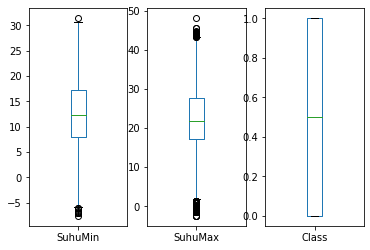

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Mengecek Outliers
f,axes = plt.subplots(1,3)
plt.figure(figsize=(20,10))
salju_test_sampling['SuhuMin'].plot(kind='box',ax=axes[0])
salju_test_sampling['SuhuMax'].plot(kind='box',ax=axes[1])
salju_test_sampling['Class'].plot(kind='box',ax=axes[2])

plt.show()

In [ ]:
#Metode IQR untuk SuhuMin
Q1=salju_test_sampling['SuhuMin'].quantile(0.25)
Q3=salju_test_sampling['SuhuMin'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

8.0
17.3
9.3
-5.950000000000001 31.25


In [ ]:
salju_test_sampling = salju_test_sampling[salju_test_sampling['SuhuMin']< Upper_Whisker]
salju_test_sampling = salju_test_sampling[salju_test_sampling['SuhuMin']> Lower_Whisker]

In [ ]:
#Metode IQR untuk SuhuMax
Q1=salju_test_sampling['SuhuMax'].quantile(0.25)
Q3=salju_test_sampling['SuhuMax'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

17.3
27.7
10.399999999999999
1.7000000000000028 43.3


In [ ]:
salju_test_sampling = salju_test_sampling[salju_test_sampling['SuhuMax']< Upper_Whisker]
salju_test_sampling = salju_test_sampling[salju_test_sampling['SuhuMax']> Lower_Whisker]

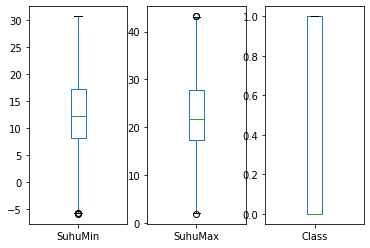

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Mengecek Outliers setelah menggunakan metode IQR
f,axes = plt.subplots(1,3)
plt.figure(figsize=(20,10))
salju_test_sampling['SuhuMin'].plot(kind='box',ax=axes[0])
salju_test_sampling['SuhuMax'].plot(kind='box',ax=axes[1])
salju_test_sampling['Class'].plot(kind='box',ax=axes[2])

plt.show()

In [ ]:
# Mengecek Data Unique
def check(data):
  for col in data.columns:
    print(col, data[col].unique())

check(salju_test_sampling)

Tanggal [ 671 2048 1861 ...   62 1358  435]
KodeLokasi [34 45  9 26 35 38 17 47 24 39 12 22  5 46  3  7 37 18 48 27  0 20 13  8
  4 32  6 14 11 28 41 33 36 10 19  1 40 16 31  2 21 23 30 25 15 42 44 29
 43]
SuhuMin [ 7.9 24.2 17.2  2.7 21.6 10.8 16.   9.  11.7 15.5 10.6 10.2 15.3  8.4
 21.1 -2.3 14.1 24.1 12.2 14.3 24.9  8.  13.4  9.2 18.8 17.8 12.6  7.7
 15.7  7.2 11.2 13.7 19.2  8.8 26.5  5.7 17.1  5.9  5.6 11.   8.6 11.6
 24.6 12.3 23.  24.5  6.1 26.4 12.4 21.9 25.   8.2  9.1 22.3 12.  26.6
 17.7 14.  12.5  8.1  9.5 16.2  8.3  7.3 23.8  3.7 14.9 11.3 21.2  6.4
  3.9 11.9 16.7 22.4  8.9 12.7 22.5 13.8 17.3 20.4 22.7 15.9 -1.1 25.4
 22.9  4.8  9.9  5.4 19.4 14.7 16.5 17.9 19.9 12.1  6.6 17.4  9.7 20.8
 13.3 18.3  7.8 25.8  3.6 10.7  7.4 13.6 10.9 21.3 15.2  0.5 21.5 13.
 11.8  9.8  5.1  6.5 24.7  7.1  8.5  4.5 20.   4.9 19.3 11.1 18.2 14.4
 16.8  6.8 18.  24.4 12.9  5.  15.6  9.4 21.4 10.5 13.2  1.3 24.  20.3
  7.5 27.8  5.5 -1.2 10.4 13.9 27.  18.5 20.6 17.  14.5 17.5 10.3 21.7
 -0.3 

In [ ]:
# Mengecek type atribut
print(salju_test_sampling.dtypes)

Tanggal                       int64
KodeLokasi                    int64
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang           int64
KecepatanAnginTerkencang    float64
ArahAngin9am                  int64
ArahAngin3pm                  int64
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni               int64
Class                         int64
dtype: object


In [ ]:
# Normalisasi data train dengan menggunakan min-max normalization
# norm = pembeda variable telah melalui feature engineering
salju_train_sampling_norm = (salju_train_sampling - salju_train_sampling.min()) / (salju_train_sampling.max() - salju_train_sampling.min())
salju_train_sampling_norm.head(5)

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Class
75745,0.122766,0.541667,0.242340,0.371921,0.000000,0.030345,0.482517,0.400000,0.335938,0.200000,0.933333,0.069231,0.252874,0.84,0.93,0.570248,0.5648,0.666667,0.666667,0.381733,0.364055,0.0,1.0
108371,0.541752,0.708333,0.331476,0.327586,0.011321,0.012414,0.482517,0.333333,0.203125,0.400000,0.400000,0.084615,0.126437,0.93,0.87,0.581818,0.5920,0.888889,0.888889,0.372365,0.368664,1.0,1.0
79848,0.970993,0.770833,0.328691,0.258621,0.009164,0.008276,0.363636,0.533333,0.265625,0.333333,0.200000,0.053846,0.126437,0.99,0.92,0.373554,0.3520,0.666667,0.666667,0.302108,0.292627,1.0,1.0
15317,0.524758,0.937500,0.860724,0.721675,0.031806,0.026207,0.223776,0.800000,0.234375,0.400000,0.666667,0.084615,0.068966,0.76,0.78,0.452893,0.4496,0.777778,0.777778,0.786885,0.686636,1.0,1.0
102437,0.753296,0.437500,0.442897,0.366995,0.026954,0.006897,0.363636,0.733333,0.320312,0.800000,0.800000,0.053846,0.252874,1.00,0.82,0.573554,0.6272,0.777778,0.777778,0.377049,0.290323,1.0,1.0


In [ ]:
# Normalisasi data test dengan menggunakan min-max normalization
# norm = pembeda variable telah melalui feature engineering
salju_test_sampling_norm = (salju_test_sampling - salju_test_sampling.min()) / (salju_test_sampling.max() - salju_test_sampling.min())
salju_test_sampling_norm.head(5)

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Class
15679,0.213219,0.708333,0.377049,0.239709,0.010518,0.011628,0.475862,0.866667,0.284483,0.466667,0.866667,0.240964,0.156627,0.897959,0.919192,0.396226,0.385900,1.000,1.000,0.305419,0.278281,1.0,1.0
15634,0.650779,0.937500,0.822404,0.806295,0.000000,0.113372,0.627586,0.000000,0.491379,0.000000,0.333333,0.265060,0.313253,0.683673,0.545455,0.506003,0.413729,0.250,0.875,0.768473,0.794118,0.0,1.0
9955,0.591357,0.187500,0.631148,0.588378,0.071197,0.058140,0.441379,0.400000,0.431034,0.333333,0.400000,0.337349,0.373494,0.948980,0.525253,0.346484,0.294991,0.625,0.875,0.544335,0.576923,1.0,1.0
1778,0.021608,0.541667,0.234973,0.334140,0.000000,0.063953,0.475862,0.200000,0.215517,0.000000,0.400000,0.132530,0.204819,0.683673,0.535354,0.790738,0.734694,0.750,0.750,0.270936,0.346154,0.0,1.0
12983,0.432158,0.729167,0.751366,0.716707,0.009709,0.066860,0.262069,0.866667,0.206897,0.400000,0.000000,0.108434,0.024096,0.887755,0.707071,0.421955,0.356215,0.250,0.875,0.684729,0.676471,1.0,1.0


#Data Pre Processing (Processed Data)

## Tanpa Feature Engineering

In [ ]:
#Data train
x_train = salju_train_sampling.drop(['Class'], axis=1)
y_train = salju_train_sampling['Class'].values

In [ ]:
x_train = x_train.values

In [ ]:
#Data test
x_test = salju_test_sampling.drop(['Class'], axis=1)
y_test = salju_test_sampling['Class'].values

In [ ]:
x_test = x_test.values

In [ ]:
len(salju_train_sampling.columns)

23

In [ ]:
len(salju_test_sampling.columns)

23

## Dengan Feature Engineering

In [ ]:
#Data train
# norm = pembeda variable telah melalui feature engineering
x_train_norm = salju_train_sampling_norm.drop(['Class'], axis=1)
y_train_norm = salju_train_sampling_norm['Class'].values

In [ ]:
x_train_norm = x_train_norm.values

In [ ]:
#Data test
# norm = pembeda variable telah melalui feature engineering
x_test_norm = salju_test_sampling_norm.drop(['Class'], axis=1)
y_test_norm = salju_test_sampling_norm['Class'].values

In [ ]:
x_test_norm = x_test_norm.values

In [ ]:
len(salju_train_sampling_norm.columns)

23

In [ ]:
len(salju_test_sampling_norm.columns)

23

#Model (Naive Bayes)

## Tanpa Feature Scaling

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train.ravel())
y_pred = gnb.predict(x_test)

In [ ]:
print("Accuracy :",metrics.accuracy_score(y_test, y_pred))
print('')
print(classification_report(y_test,y_pred))

Accuracy : 0.742873742692182

              precision    recall  f1-score   support

           0       0.73      0.78      0.75     13779
           1       0.76      0.70      0.73     13760

    accuracy                           0.74     27539
   macro avg       0.74      0.74      0.74     27539
weighted avg       0.74      0.74      0.74     27539



## Dengan Feature Engineering

In [ ]:
# norm = pembeda variable telah melalui feature engineering
gnb = GaussianNB()
gnb.fit(x_train_norm, y_train_norm.ravel())
y_pred_norm = gnb.predict(x_test_norm)

In [ ]:
print("Accuracy :",metrics.accuracy_score(y_test_norm, y_pred_norm))
print('')
print(classification_report(y_test_norm,y_pred_norm))

Accuracy : 0.7316896038345619

              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74     13779
         1.0       0.75      0.69      0.72     13760

    accuracy                           0.73     27539
   macro avg       0.73      0.73      0.73     27539
weighted avg       0.73      0.73      0.73     27539

